In [1]:
using DelimitedFiles
using Plots
using Statistics
using LinearAlgebra
using CSV, DataFrames
using NPZ

In [2]:
path="z0.0/BAO/"

"z0.0/BAO/"

In [3]:
Bkk_mean = zeros(2600, 4);
Bkk_var = zeros(2600);

In [4]:
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Bk_"
        Bkk = readdlm(string(path,filename))
        Nfiles += 1
        Bkk_mean += Bkk
    end
end
#print(size(Bkk_mean))
#print(Nfiles)
Bkk_mean /= Nfiles;
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Bk_"
        Bkk = readdlm(string(path,filename))
        Nfiles += 1
        Bkk_var += (Bkk_mean[:,4] .- Bkk[:,4]).^2
    end
end
Bkk_var = Bkk_var/Nfiles;

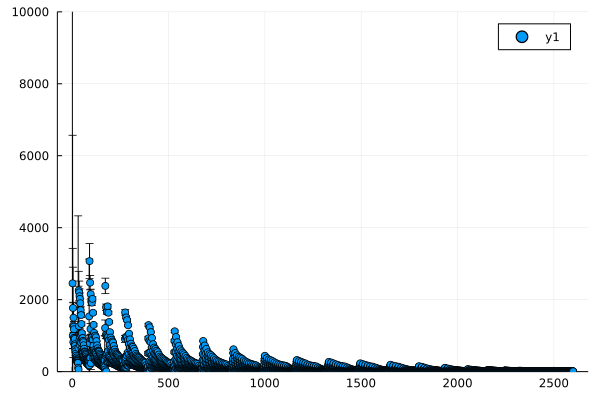

In [5]:
plot(abs.(Bkk_mean[:,4]), yerror=sqrt.(Bkk_var./90), seriestype=:scatter, ylims=(0, 10000))
#savefig("Bkkmean_z0.50.png")

In [ ]:
plot(abs.(Bkk_mean[:,4])/sqrt.(Bkk_var./90), seriestype=:scatter)


In [ ]:
path="z0.0/noBAO/"

In [ ]:
Bkk_mean_no = zeros(2600, 4);
Bkk_var_no = zeros(2600);
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Bk_"
        Bkk = readdlm(string(path,filename))
        Nfiles += 1
        Bkk_mean_no += Bkk
    end
end
Bkk_mean_no /= Nfiles;
Nfiles = 0
for filename in readdir(path)
    if filename[1:3] == "Bk_"
        Bkk = readdlm(string(path,filename))
        Nfiles += 1
        Bkk_var_no += (Bkk_mean_no[:,4] .- Bkk[:,4]).^2
    end
end
Bkk_var_no = Bkk_var_no/Nfiles;

In [ ]:
ratio = Bkk_mean_no[:,4]./Bkk_mean[:,4];
ratio_var = (Bkk_var./Bkk_mean[:,4].^2 .+ Bkk_var_no./Bkk_mean_no[:,4].^2).*ratio.^2;

In [ ]:
rr = 1:2600
plot(Bkk_mean[rr,1],ratio[rr],yerror=sqrt.(ratio_var[rr]/90),seriestype=:scatter,ylims=(0.7,1.3),label="z=0.50``")
plot!(Bkk_mean[rr,1],ratio[rr].^0,ylims=(0.7,1.3),reuse=false,label="")
#savefig("ratio_z0.50.png")

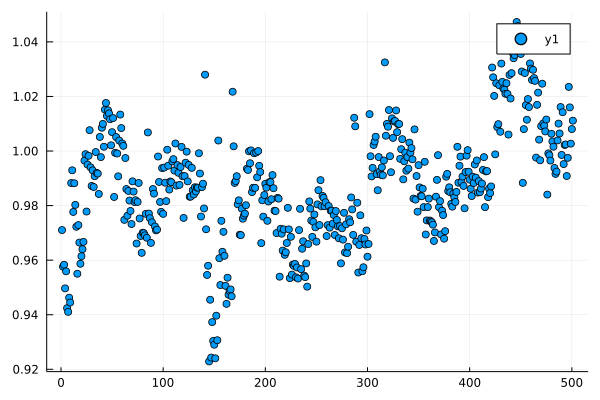

In [17]:
plot(Bkk_mean_no[1500:2000,4]./Bkk_mean[1500:2000,4], seriestype=:scatter)

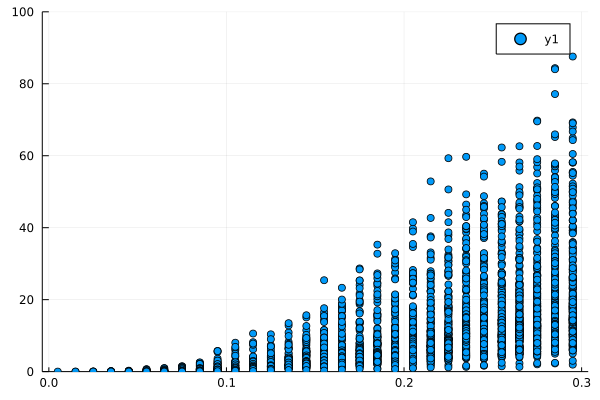

In [18]:
plot(Bkk_mean[:,3],1 ./ratio_var,ylims=(0,100), seriestype=:scatter)

In [19]:
# importing the required module
using CSV, DataFrames

# using write method
CSV.write("Bkavg_z0.73.DAT", DataFrame(hcat(Bkk_mean,Bkk_var,Bkk_mean_no[:,4],Bkk_var_no,ratio_var)),header = false,delim = '\t')

#CSV.write("Bkavg_bao.DAT", DataFrame(Bkk_mean),header = false,delim = '\t')

"Bkavg_z0.73.DAT"

In [25]:
using Random

In [45]:
hcat(Bkk_mean,Bkk_mean_no[:,4],ratio_var)

2600×6 Matrix{Float64}:
 0.005  0.005  0.005  -24401.5     -33228.7     270.026
 0.005  0.015  0.015    -127.965     -205.634     6.26628e5
 0.005  0.025  0.025   -4689.8      -5928.12    107.457
 0.005  0.035  0.035    2897.5       2989.47     51.0517
 0.005  0.045  0.045    2578.23      2964.73     28.092
 0.005  0.055  0.055    2694.06      2947.36     14.3124
 0.005  0.065  0.065    3092.06      3324.36      6.45138
 0.005  0.075  0.075    2293.43      2434.13      6.15102
 0.005  0.085  0.085    2160.26      2173.13      4.26242
 0.005  0.095  0.095    1564.31      1693.93      3.95755
 0.005  0.105  0.105    1160.37      1303.7       3.83388
 0.005  0.115  0.115    1141.92      1315.68      2.95322
 0.005  0.125  0.125    1494.56      1673.03      1.37647
 ⋮                                                ⋮
 0.265  0.285  0.295      13.4048      13.7753    0.0897758
 0.265  0.295  0.295      13.6738      14.0915    0.170757
 0.275  0.275  0.275      15.6958      16.1394    0.48232

In [36]:
size(ratio_var)

(2600,)